# 2. Základy knihovny physt

In [1]:
# Nutné importy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Pojďme si načíst data z předchozího příkladu (ale "jenom" milion)
teploty = pd.read_csv("../data/teploty.csv.gz", squeeze=True, dtype=np.float32, header=None)

# Opět omezíme teploty na "rozumné" rozmezí
teploty = teploty[teploty > -50]
teploty = teploty[teploty < 60]

teploty.name = "Teplota"

In [3]:
teploty.head()

0    8.6
1    8.9
2    9.1
3    9.2
4    9.4
Name: Teplota, dtype: float32

In [4]:
import physt
from physt import h1

## Objektová reprezentace

Nejjednodušší histogram

In [5]:
H = physt.h1(teploty)
H

Histogram1D(bins=(10,), total=999995, dtype=int64)

In [6]:
# Odpovídá stejnému volání v numpy
H.numpy_like()

(array([  7842, 112848, 256392, 230054, 221127, 124193,  39884,   6527,
           967,    161]),
 array([-10.89999962,  -4.54999981,   1.8       ,   8.14999981,
         14.49999962,  20.84999943,  27.19999924,  33.54999905,
         39.89999886,  46.24999866,  52.59999847]))

In [7]:
# Trošku vivisekce histogramu neuškodí
H.to_dict()

OrderedDict([('histogram_type', 'Histogram1D'),
             ('binnings',
              [OrderedDict([('adaptive', False),
                            ('binning_type', 'NumpyBinning'),
                            ('numpy_bins',
                             [-10.899999618530273,
                              -4.549999809265136,
                              1.8000000000000007,
                              8.14999980926514,
                              14.499999618530275,
                              20.84999942779541,
                              27.199999237060553,
                              33.54999904632569,
                              39.89999885559082,
                              46.24999866485596,
                              52.599998474121094])])]),
             ('frequencies',
              [7842,
               112848,
               256392,
               230054,
               221127,
               124193,
               39884,
               6527,
             

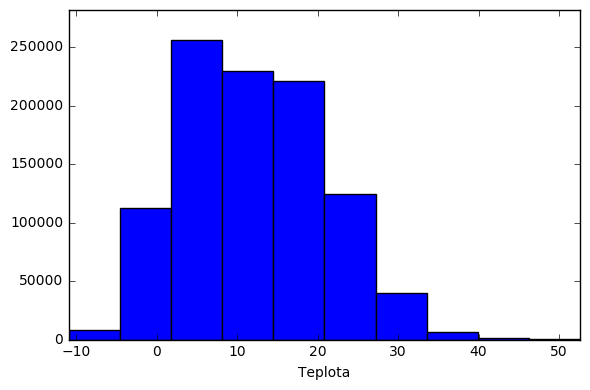

In [8]:
H.plot()

## "inteligentní" biny

### Pevná šířka

(array([   77,   243,   441,   818,  1424,  2665,  4913,  7151, 10902,
        15419, 20666, 27099, 32223, 37130, 41752, 44460, 42486, 39754,
        39562, 39277, 38861, 36330, 35064, 34336, 35570, 37635, 38421,
        37155, 35229, 32982, 31541, 29505, 26178, 23819, 20705, 18787,
        16073, 13446, 10913,  8999,  7369,  5562,  4299,  3502,  2596,
         1919,  1311,   933,   662,   465,   260,   213,   204,   173,
          135,   109,    86,    66,    44,    39,    18,    11,     6,     2]),
 array([-11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,
          0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.]))

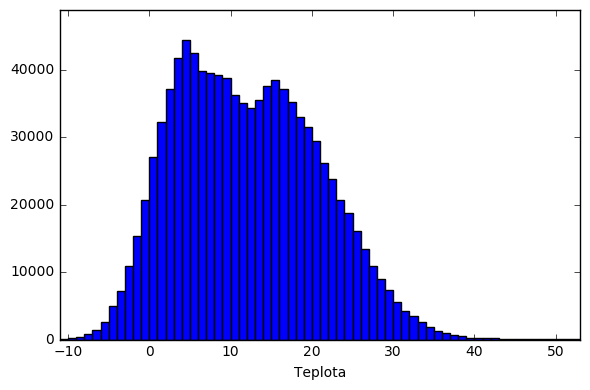

In [9]:
H = physt.h1(teploty, "fixed_width", bin_width=1, adaptive=True )
H.plot()
H.numpy_like()

In [10]:
H._binning.to_dict()

OrderedDict([('adaptive', True),
             ('binning_type', 'FixedWidthBinning'),
             ('bin_count', 64),
             ('bin_width', 1.0),
             ('bin_shift', 0.0),
             ('bin_times_min', -11)])

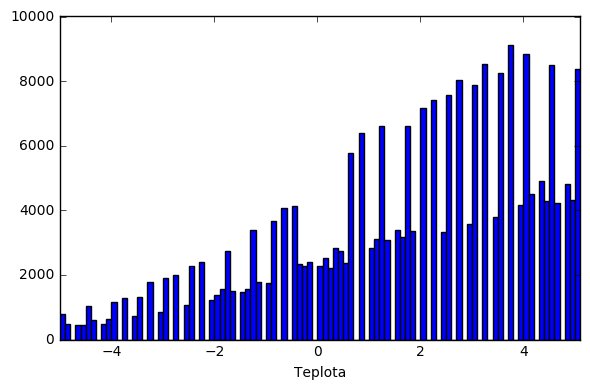

In [11]:
# Na úrovni nejnižšího rozlišení
H = physt.h1(teploty, "fixed_width", bin_width=.1, adaptive=True, range=(-5, 5))
H.plot();

To nebude dobře, začínáme si hrát se zaokrouhlovací chybou!

Trochu to ošidíme (pro počítač je šesté desetinné místo zajímavé), pro nás ne.

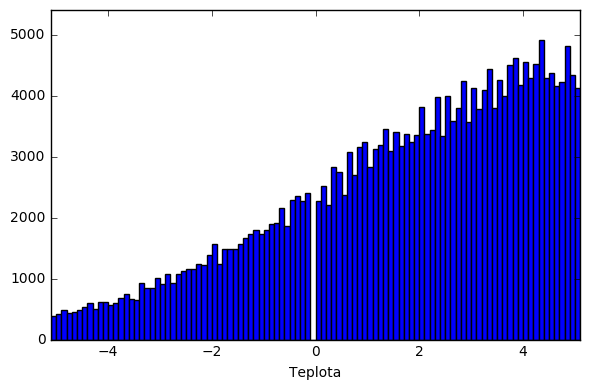

In [12]:
H = physt.h1(teploty, "fixed_width", bin_width=.099999, adaptive=True, range=(-5, 5))
H.plot();

**Varování**: Vyhýbejte se hodnotám na hranici binu a mějte opravdu "float" data

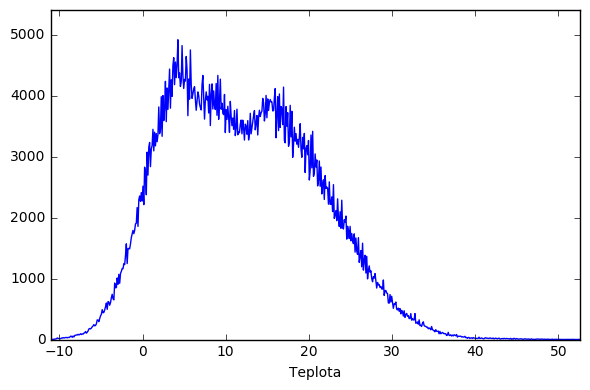

In [13]:
H = physt.h1(teploty, "fixed_width", bin_width=.099999, bin_shift=0.001, adaptive=True)
H.plot("line");

### Automatická vhodná šířka ("human")

array([-12.5, -10. ,  -7.5,  -5. ,  -2.5,   0. ,   2.5,   5. ,   7.5,
        10. ,  12.5,  15. ,  17.5,  20. ,  22.5,  25. ,  27.5,  30. ,
        32.5,  35. ,  37.5,  40. ,  42.5,  45. ,  47.5,  50. ,  52.5,  55. ])

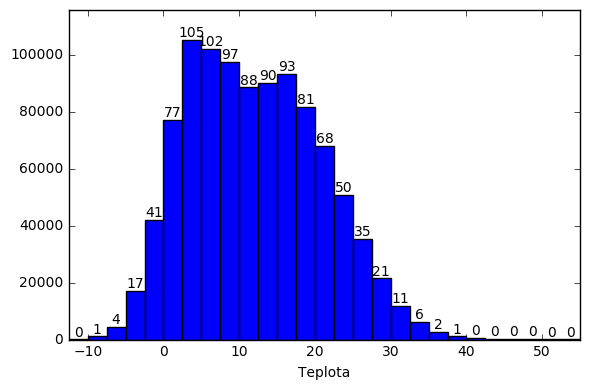

In [14]:
H = physt.h1(teploty, "human")
H.plot(show_values=True, value_format=lambda x:int(x / 1000))
H.numpy_bins

In [15]:
for n in [3, 7, 10, 15, 20, 40, 50]:
    H = physt.h1(teploty, "human", n)
    print(n, H.bin_count, H._binning.bin_width)

3 4 20.0
7 8 10.0
10 14 5.0
15 14 5.0
20 27 2.5
40 33 2.0
50 64 1.0


### Biny o stejném obsahu

(array([32826, 31893, 33056, 33454, 34066, 33449, 31114, 34784, 33206,
        31775, 35574, 31464, 35373, 33521, 32104, 34764, 31186, 36069,
        30215, 34786, 33632, 31591, 33676, 34979, 32534, 33842, 35036,
        32175, 34488, 33363]),
 array([-10.89999962,  -1.70000005,   0.        ,   1.20000005,
          2.20000005,   3.0999999 ,   3.9000001 ,   4.5999999 ,
          5.4000001 ,   6.19999981,   7.        ,   7.9000001 ,
          8.69999981,   9.60000038,  10.5       ,  11.39999962,
         12.39999962,  13.30000019,  14.30000019,  15.10000038,
         16.        ,  16.89999962,  17.79999924,  18.79999924,
         19.89999962,  21.        ,  22.29999924,  23.89999962,
         25.70000076,  28.60000038,  52.59999847]))

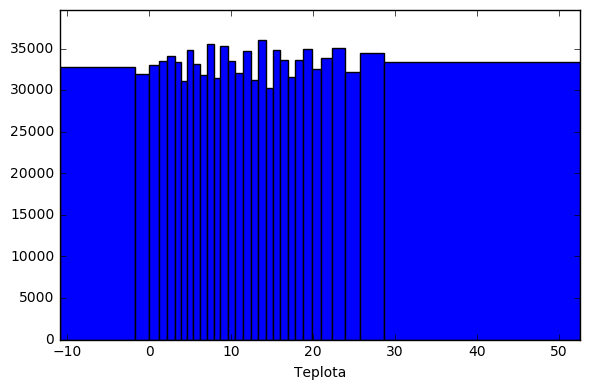

In [16]:
H = physt.h1(teploty, "quantile", 30)    
H.plot()     # Mělo by být stejně široké! Ale není
H.numpy_like()

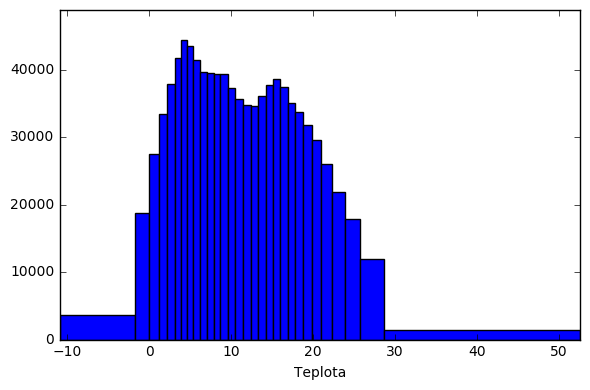

In [17]:
physt.h1(teploty, "quantile", 30).plot(density=True)

### Exponenciální

In [18]:
# Teploty (zatím) nejsou exponenciální, tak jiná data (možná nebude fungovat):
countries = pd.read_csv("https://www.worlddata.info/download/countries.csv", delimiter=";")
countries = countries[(countries.Population > 0) & (countries.Area > 0)]

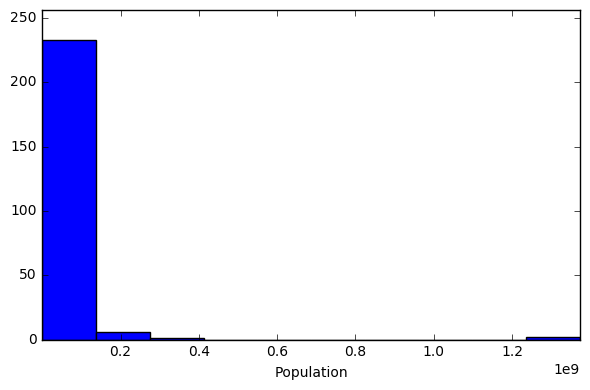

In [19]:
h1(countries.Population).plot();

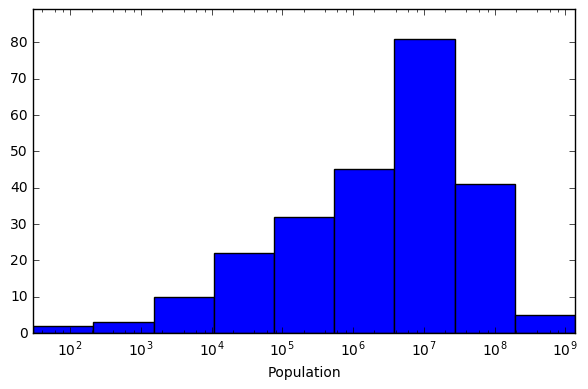

In [20]:
h1(countries.Population, "exponential").plot(xscale="log");

## Plnění histogramů

In [21]:
np.random.seed(42)
H = physt.h1(None, "fixed_width", 5, adaptive=True)
H

Histogram1D(bins=(0,), total=0.0, dtype=None)

Histogram1D(bins=(10,), total=1000.0, dtype=None)

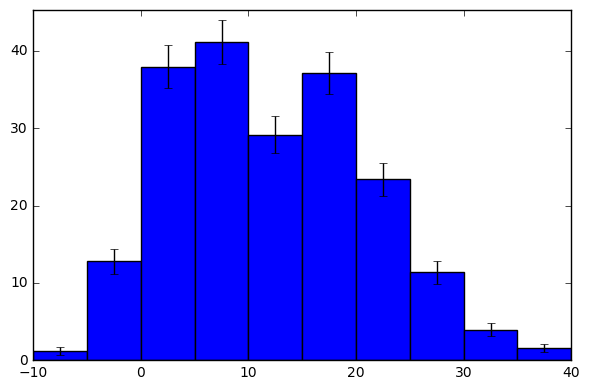

In [22]:
# Mačkejte Control+Enter, dokud vás to nepřestane bavit
H.fill_n(np.random.choice(teploty, 1000))
H.plot("bar", errors=True, density=True)
H